*This notebook is the one with the "new" attendance_list upgrade function*

# Run 2.0 

The aim of this jupyter is to gain experience in the model dynamics

In [9]:
%reload_ext autoreload
%autoreload 2

#Phase Diagram
import random
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from ABM_model import AttendanceModel

#Adj Matrix Visualization
import pathpy as pp
from IPython.display import *
from mesa import Model
from mesa import Agent
import matplotlib.pyplot as plt
from visualization import AdjacencyGauss, neighbor, plot_adj_matrix, get_adj_matrix, initial_emotion_hist, plot_attendance, plot_agents, plot_attendance_step

### Possible basic online scenario
Let's start with the simplest scenario and we add more parameters to study the effects 

* Change the way in which the adjMatrix is initialized to avoid links between all the students (more realistic scenario)

* Turn off updating strategy of adjMatrix to keep the model as simple as possible
* Teacher parameters set in the middle of the possible range (average teacher assumption)
* "Dividing into groups policy" off 
* Keep the number of interactions 2 $\times$ num_agents




In [10]:
# ==============================basic parameters=========================
'''
(max_steps % lecture_duration) should be equal to 0
teacher node only works as a sender
'''
num_agents = 50
# the adjacencyMatrix should be symmetric, the friendships are mutual, it doesn't matter what the diagonal values are because we won't use the diagonal values
seed = 32
random.seed(seed)

adjacencyMatrix = np.zeros((num_agents, num_agents))
adjacencyMatrix = (adjacencyMatrix + adjacencyMatrix.T) / 2
max_steps = 500
lecture_duration = 50
# according to the 'closure property' in the paper, delta_t should be less than 1/(|G|-1)
dt = 0.02
initial_emotion_mu = 0.5
initial_emotion_sigma = 0.2


# ========================updating adjacency matrix=======================
updateAdj = False
friendship_increase = 0.0
my_lambda = 0.9



# =======================parameters for teacher==========================
# if we set the expressiveness of teacher to 0, it has no effects on the network - we don't consider teacher node
expressiveness_teacher = 1
initial_emotion_teacher = 0.7
# this sigma is used to generate the sigma of the alphas from the teacher node to student nodes
teacher_send_alpha_sigma = 1
# lowerbound for the alpha between the teacher node and the students node
alpha_t_lowerbound = 0.1



# ===================parameters for "breakout room" policy=============
# parameters for the "breakout room" policy, if divided_into_groups=False, the group_num is forced to be 1 
divided_into_groups = False
group_num = 5


In [11]:
# ===========================run model===============================
model = AttendanceModel(num_agents=num_agents, adjacencyMatrix=adjacencyMatrix, seed=seed, expressiveness_teacher=expressiveness_teacher, initial_emotion_teacher=initial_emotion_teacher, updateAdj=updateAdj, my_lambda=my_lambda, teacher_send_alpha_sigma=teacher_send_alpha_sigma,friendship_increase=friendship_increase, initial_emotion_mu=initial_emotion_mu, divided_group=divided_into_groups, group_num=group_num, alpha_t_lowerbound=alpha_t_lowerbound, initial_emotion_sigma=initial_emotion_sigma, max_steps=max_steps, lecture_duration=lecture_duration, dt=dt)
model.run_model()

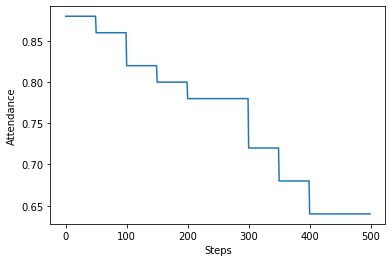

In [12]:
plot_attendance(model)

In [13]:
neighbor(get_adj_matrix(model, -1), 0, num_agents)

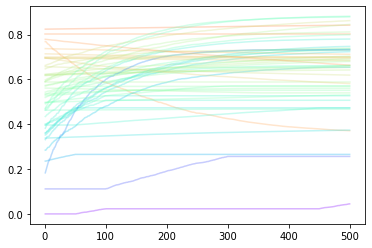

In [14]:
plot_agents(model)

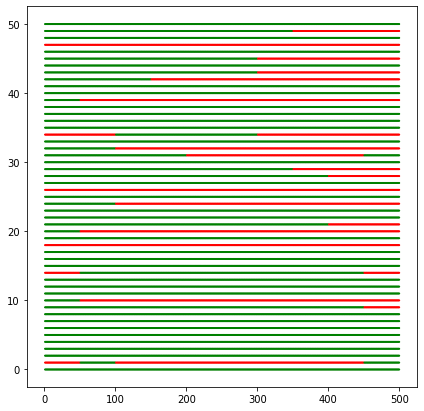

In [15]:
plot_attendance_step(model)

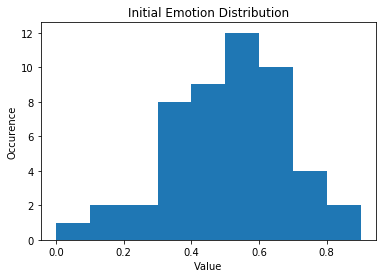

In [16]:
initial_emotion_hist(model, num_agents)